<h1 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques</h1>
<h1 style="color:rgb(0,120,170)">Assignment 2a: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

########## YOUR SOLUTION HERE ##########

$$ln\mathcal{L}(\lambda) = ln\prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} = \sum_{i=1}^{n} ln \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} = \sum_{i=1}^{n} ln (\lambda^{x_{i}}\mathcal{e}^{-\lambda}) - ln (x_{i}!) = \sum_{i=1}^{n} ln \lambda^{x_{i}} + ln \mathcal{e}^{-\lambda} - ln x_{i}! = \sum_{i=1}^{n} {x_{i}} ln \lambda - \lambda ln \mathcal{e} - ln x_{i}! = $$

$$ = \sum_{i=1}^{n} {x_{i}} ln \lambda - \lambda - ln x_{i}! = -n \lambda + \sum_{i=1}^{n} {x_{i}} ln \lambda  - ln x_{i}! = -n \lambda + \sum_{i=1}^{n} {x_{i}} ln \lambda  - \sum_{i=1}^{n} ln x_{i}! = -n \lambda + ln \lambda \sum_{i=1}^{n} {x_{i}}  - \sum_{i=1}^{n} ln x_{i}! $$

Now we should take the first derivative of the log-likelihood respect to $\lambda$ and equals to zero

$$ \frac{\partial}{\partial \lambda} \Big(-n \lambda + ln \lambda \sum_{i=1}^{n} {x_{i}}  - \sum_{i=1}^{n} ln x_{i}! \Big)= 0 $$
$$ \frac{\partial}{\partial \lambda} = -n + \frac{1}{\lambda} \sum_{i=1}^{n} {x_{i}} = 0 $$
$$ \frac{1}{\lambda} \sum_{i=1}^{n} {x_{i}} = n $$
$$ \hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} {x_{i}} $$

To check if this maximize or minimize the log likelihood we need to check the sign of the second derivative respect to $\lambda$

$$ \frac{\partial}{\partial \lambda ^2} \Big(-n + \frac{1}{\lambda} \sum_{i=1}^{n} {x_{i}}\Big) = - \frac{1}{\lambda^2} \sum_{i=1}^{n} {x_{i}}$$
<br>
$x_i$ represents in the poisson distribution the number of occurrences of a determinate event. Therefore $x_i$ is a natural number, therefore, $\forall x_i : \sum_{i=1}^{n} {x_{i}} \geq 0$. Hence:
$$\forall \lambda \neq 0: - \frac{1}{\lambda^2} \sum_{i=1}^{n} {x_{i}} \geq 0 $$
<br>
Hence, $\frac{1}{n} \sum_{i=1}^{n} {x_{i}}$ maximizes the log-likelihood

In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [2]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


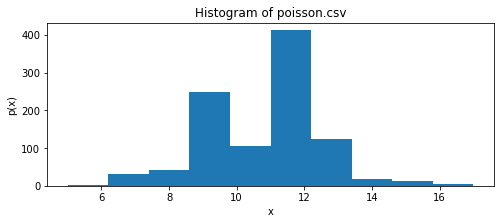

In [3]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [4]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [5]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [6]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    ########## YOUR SOLUTION HERE ##########
    lam_max_formula = np.mean(X)
    
    return lam_max_formula

In [7]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [14]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

    ########## YOUR SOLUTION HERE ##########
    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    for i in lam_set:
        if loglikelihood(X, i) == ln_max:
            lam_max = i
            break
    
    return loglikelih, ln_min, ln_max, lam_max

In [15]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('           Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
           Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

No handles with labels found to put in legend.


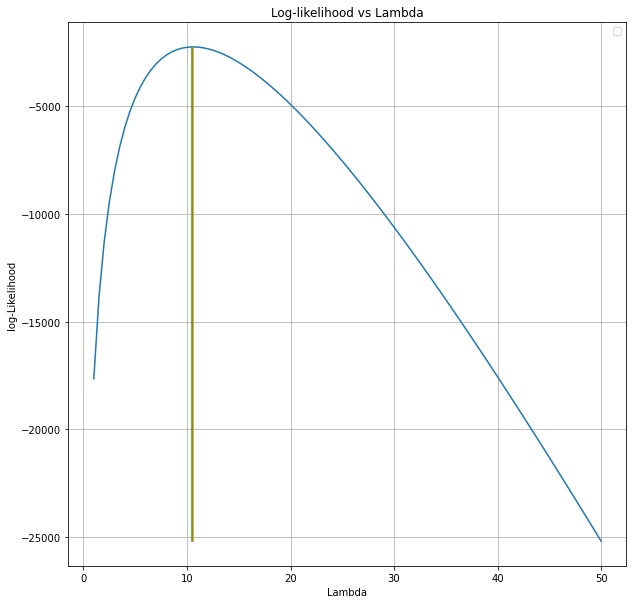

In [26]:
########## YOUR SOLUTION HERE ##########
fig = plt.figure(figsize=(10,10))
plt.plot(lam_set, loglikelih)
y = np.arange(ln_min,ln_max, 100)
plt.plot ( [lam_max_formula for i in range(len(y))], y)
plt.plot ( [lam_max for i in range(len(y))], y)
plt.title('Log-likelihood vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('log-Likelihood')
plt.grid()
plt.legend()
plt.show();

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

########## YOUR SOLUTION HERE ##########

In [ ]:
The maximum is in the mean of the elements of the set.